<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data_multi_delta_(4)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_4_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,88.623820,30.724864,56.053287,42.571750,-1854.432939,-1626.459219,40.467945,-1666.927164
1,0.0,1.0,54.906817,37.069651,73.693980,58.904931,2314.502225,2549.077604,381.317481,2167.760122
2,0.0,2.0,68.373450,25.428939,77.940633,93.569881,1307.831760,1583.144664,1194.129266,389.015398
3,0.0,3.0,95.271244,61.934277,95.897697,73.447122,3340.914933,3677.465272,-1514.564820,5192.030092
4,0.0,4.0,55.961012,69.510410,66.532998,35.875472,-6594.188328,-6356.308436,-1340.696860,-5015.611576
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,44.200091,72.309630,44.689406,53.115463,-2748.699338,-2524.384747,996.351782,-3520.736529
59996,999.0,56.0,88.702089,20.336177,34.889659,24.985824,-397.164917,-218.251169,772.806955,-991.058124
59997,999.0,57.0,33.596217,41.264699,33.007945,95.471826,-535.015355,-321.674668,-343.097415,21.422748
59998,999.0,58.0,35.689761,95.952809,50.570372,28.861898,-3852.562000,-3631.487159,1717.254281,-5348.741440


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    88.623820  30.724864  56.053287  42.571750 -1854.432939   
      1.0    54.906817  37.069651  73.693980  58.904931  2314.502225   
      2.0    68.373450  25.428939  77.940633  93.569881  1307.831760   
      3.0    95.271244  61.934277  95.897697  73.447122  3340.914933   
      4.0    55.961012  69.510410  66.532998  35.875472 -6594.188328   
...                ...        ...        ...        ...          ...   
999.0 55.0   44.200091  72.309630  44.689406  53.115463 -2748.699338   
      56.0   88.702089  20.336177  34.889659  24.985824  -397.164917   
      57.0   33.596217  41.264699  33.007945  95.471826  -535.015355   
      58.0   35.689761  95.952809  50.570372  28.861898 -3852.562000   
      59.0   62.164793  94.263595  77.423411  92.700660  2442.258906   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0   -1626.459219    40.467945 -1666.927164  
      1.0    2549.077604   381.317481  2167.760122  
      2.0    1583.144664  1194.129266   389.015398  
      3.0    3677.465272 -1514.564820  5192.030092  
      4.0   -6356.308436 -1340.696860 -5015.611576  
...                  ...          ...          ...  
999.0 55.0  -2524.384747   996.351782 -3520.736529  
      56.0   -218.251169   772.806955  -991.058124  
      57.0   -321.674668  -343.097415    21.422748  
      58.0  -3631.487159  1717.254281 -5348.741440  
      59.0   2778.811364   933.055723  1845.755641  

[60000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    88.623820  30.724864  56.053287  42.571750 -1854.432939   
      1.0    54.906817  37.069651  73.693980  58.904931  2314.502225   
      2.0    68.373450  25.428939  77.940633  93.569881  1307.831760   
      3.0    95.271244  61.934277  95.897697  73.447122  3340.914933   
      4.0    55.961012  69.510410  66.532998  35.875472 -6594.188328   
...                ...        ...        ...        ...          ...   
999.0 55.0   44.200091  72.309630  44.689406  53.115463 -2748.699338   
      56.0   88.702089  20.336177  34.889659  24.985824  -397.164917   
      57.0   33.596217  41.264699  33.007945  95.471826  -535.015355   
      58.0   35.689761  95.952809  50.570372  28.861898 -3852.562000   
      59.0   62.164793  94.263595  77.423411  92.700660  2442.258906   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0   -1626.459219    40.467945 -1666.927164  
      1.0    2549.077604   381.317481  2167.760122  
      2.0    1583.144664  1194.129266   389.015398  
      3.0    3677.465272 -1514.564820  5192.030092  
      4.0   -6356.308436 -1340.696860 -5015.611576  
...                  ...          ...          ...  
999.0 55.0  -2524.384747   996.351782 -3520.736529  
      56.0   -218.251169   772.806955  -991.058124  
      57.0   -321.674668  -343.097415    21.422748  
      58.0  -3631.487159  1717.254281 -5348.741440  
      59.0   2778.811364   933.055723  1845.755641  

[60000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,88.623820,30.724864,56.053287,42.571750,-1854.432939,-1626.459219,40.467945,-1666.927164
1,0.0,1.0,54.906817,37.069651,73.693980,58.904931,2314.502225,2549.077604,381.317481,2167.760122
2,0.0,2.0,68.373450,25.428939,77.940633,93.569881,1307.831760,1583.144664,1194.129266,389.015398
3,0.0,3.0,95.271244,61.934277,95.897697,73.447122,3340.914933,3677.465272,-1514.564820,5192.030092
4,0.0,4.0,55.961012,69.510410,66.532998,35.875472,-6594.188328,-6356.308436,-1340.696860,-5015.611576
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,44.200091,72.309630,44.689406,53.115463,-2748.699338,-2524.384747,996.351782,-3520.736529
59996,999.0,56.0,88.702089,20.336177,34.889659,24.985824,-397.164917,-218.251169,772.806955,-991.058124
59997,999.0,57.0,33.596217,41.264699,33.007945,95.471826,-535.015355,-321.674668,-343.097415,21.422748
59998,999.0,58.0,35.689761,95.952809,50.570372,28.861898,-3852.562000,-3631.487159,1717.254281,-5348.741440


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    88.623820  30.724864  56.053287  42.571750 -1854.432939   
      1.0    54.906817  37.069651  73.693980  58.904931  2314.502225   
      2.0    68.373450  25.428939  77.940633  93.569881  1307.831760   
      3.0    95.271244  61.934277  95.897697  73.447122  3340.914933   
      4.0    55.961012  69.510410  66.532998  35.875472 -6594.188328   
...                ...        ...        ...        ...          ...   
999.0 55.0   44.200091  72.309630  44.689406  53.115463 -2748.699338   
      56.0   88.702089  20.336177  34.889659  24.985824  -397.164917   
      57.0   33.596217  41.264699  33.007945  95.471826  -535.015355   
      58.0   35.689761  95.952809  50.570372  28.861898 -3852.562000   
      59.0   62.164793  94.263595  77.423411  92.700660  2442.258906   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0   -1626.459219    40.467945 -1666.927164  
      1.0    2549.077604   381.317481  2167.760122  
      2.0    1583.144664  1194.129266   389.015398  
      3.0    3677.465272 -1514.564820  5192.030092  
      4.0   -6356.308436 -1340.696860 -5015.611576  
...                  ...          ...          ...  
999.0 55.0  -2524.384747   996.351782 -3520.736529  
      56.0   -218.251169   772.806955  -991.058124  
      57.0   -321.674668  -343.097415    21.422748  
      58.0  -3631.487159  1717.254281 -5348.741440  
      59.0   2778.811364   933.055723  1845.755641  

[60000 rows x 8 columns]

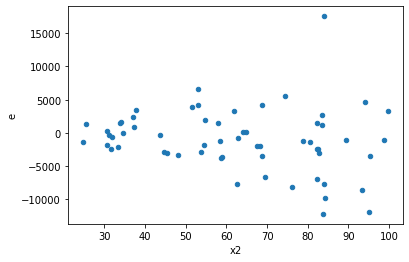

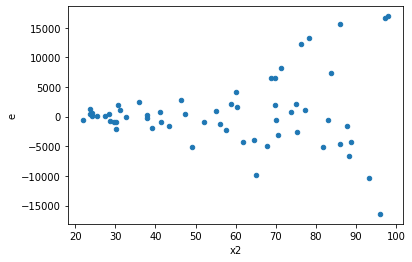

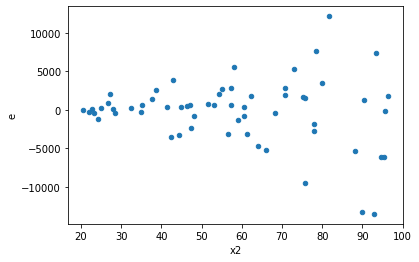

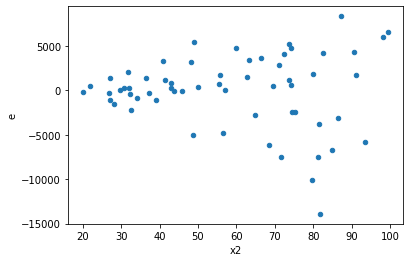

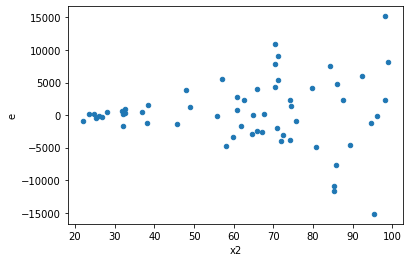

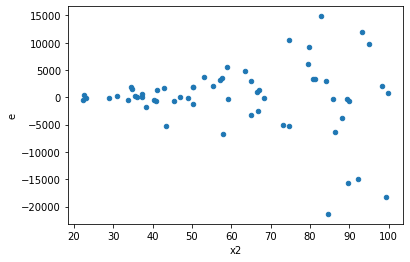

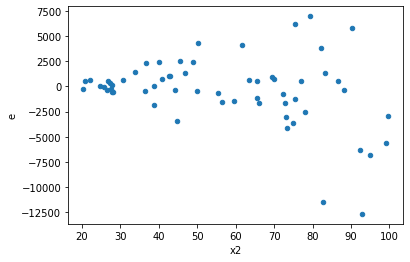

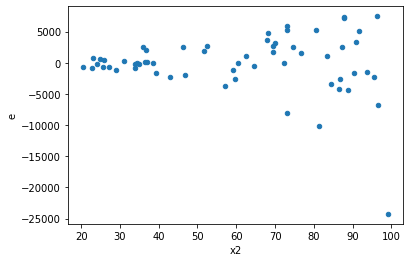

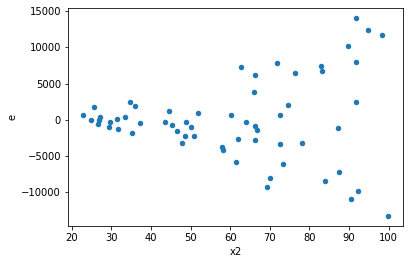

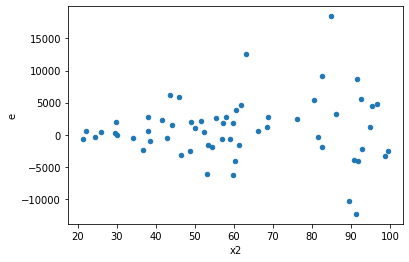

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[['x1', 'x2', 'x3', 'x4']]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,27.0,25.0,491423201.9457669,582073977.8449,18200859.3313247,23282959.113796,1.279223067985846,0.5388520773785048,0.7305739613107476,0.2694260386892524,Reject001=1 : Homoscedasticity
2.0,28.0,24.0,406896442.1320517,455668809.2878549,14532015.790430417,18986200.386993956,1.3065083785208034,0.5094516323018601,0.74527418384907,0.25472581615093004,Reject001=1 : Homoscedasticity
4.0,35.0,17.0,580332635.8827554,620132044.5120987,16580932.453793012,36478355.55953521,2.200018344034115,0.08539647079161305,0.9573017646041935,0.04269823539580653,Reject001=1 : Homoscedasticity
6.0,21.0,31.0,54182342.290911205,340264426.519559,2580111.537662438,10976271.823211582,4.25418500827914,0.00028579730887878796,0.9998571013455606,0.00014289865443939398,Reject001=0 : Heteroscedasticity
13.0,19.0,33.0,143930705.29382327,666532713.1030523,7575300.278622277,20197961.003122795,2.6662917983755765,0.013105306540492911,0.9934473467297535,0.006552653270246456,Reject001=1 : Homoscedasticity
14.0,23.0,29.0,56647525.704964034,1033336712.4442327,2462935.9002158274,35632300.42911147,14.467408764470488,4.4084202954763896e-10,0.999999999779579,2.2042101477381948e-10,Reject001=0 : Heteroscedasticity
15.0,24.0,28.0,66486500.86386293,1372552826.4512165,2770270.869327622,49019743.80182916,17.6949280825116,5.5667692677729974e-11,0.9999999999721662,2.7833846338864987e-11,Reject001=0 : Heteroscedasticity
16.0,14.0,38.0,123298882.44277024,558372848.6804582,8807063.031626446,14694022.333696268,1.668436149591477,0.20948645647033493,0.8952567717648325,0.10474322823516746,Reject001=1 : Homoscedasticity
17.0,25.0,27.0,561721803.7365386,781540984.3428286,22468872.149461545,28945962.383067727,1.2882694863596615,0.5193269547426911,0.7403365226286545,0.25966347737134554,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,27.0,25.0,491423201.9457669,582073977.8449,18200859.3313247,23282959.113796,1.279223067985846,0.5388520773785048,Reject001=1 : Homoscedasticity
1.0,25.0,27.0,1149336875.2822204,576183782.4221234,45973475.011288814,21340140.089708276,0.4641837512711013,0.057474863310772964,Reject001=1 : Homoscedasticity
2.0,28.0,24.0,406896442.1320517,455668809.2878549,14532015.790430417,18986200.386993956,1.3065083785208034,0.5094516323018601,Reject001=1 : Homoscedasticity
3.0,26.0,26.0,555368042.8181356,398299287.51306576,21360309.339159064,15319203.365887145,0.7171807824806645,0.4023022250965041,Reject001=1 : Homoscedasticity
4.0,35.0,17.0,580332635.8827554,620132044.5120987,16580932.453793012,36478355.55953521,2.200018344034115,0.08539647079161305,Reject001=1 : Homoscedasticity
5.0,23.0,29.0,1171269823.875218,852337329.4347048,50924774.95109643,29390942.394300167,0.5771442764847676,0.17992950160017904,Reject001=1 : Homoscedasticity
6.0,21.0,31.0,54182342.290911205,340264426.519559,2580111.537662438,10976271.823211582,4.25418500827914,0.00028579730887878796,Reject001=0 : Heteroscedasticity
7.0,31.0,21.0,1029316443.2656802,42480698.91409218,33203756.23437678,2022890.4244805803,0.060923541607808364,3.943931632541762e-11,Reject001=0 : Heteroscedasticity
8.0,28.0,24.0,1140983070.756208,408905078.23098505,40749395.38415028,17037711.59295771,0.418109555549004,0.028094225935161646,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      557
Reject001=0 : Heteroscedasticity    443
Name: Result_test, dtype: int64